# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.model_selection import cross_val_score

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [3]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [6]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
df = pd.read_csv(url)
df.columns = names

In [7]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

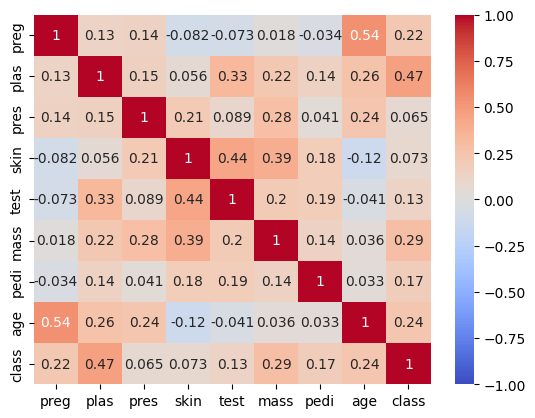

In [14]:
sns.heatmap(df.corr(numeric_only= True), vmin = -1, vmax = 1, annot= True, cmap = 'coolwarm')

### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [16]:
x = df.drop(columns = 'class')
y = df['class']

In [41]:
estimator = DecisionTreeClassifier(random_state= 42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators = 100,
    bootstrap = True,
    max_features = 3,
    random_state = 42
)

bag_clf.fit(x,y)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=3, n_estimators=100, random_state=42)

In [42]:
bag_clf_cv = cross_val_score(bag_clf, x, y, cv=10, scoring='accuracy')

print("Puntuaciones de la validación cruzada:", bag_clf_cv)
print("Precisión media:", bag_clf_cv.mean())

Puntuaciones de la validación cruzada: [0.68831169 0.76623377 0.75324675 0.7012987  0.74025974 0.71428571
 0.75324675 0.71052632 0.72368421 0.76315789]
Precisión media: 0.7314251537935749


### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [43]:
estimator = RandomForestClassifier(random_state= 42)

rf_class = RandomForestClassifier(
    n_estimators = 100,
    bootstrap = True,
    max_features = 3,
    random_state = 42
)

rf_class.fit(x,y)

RandomForestClassifier(max_features=3, random_state=42)

In [44]:
rf_class_cv = cross_val_score(rf_class, x, y, cv=10, scoring='accuracy')

print("Puntuaciones de la validación cruzada:", rf_class_cv)
print("Precisión media:", rf_class_cv.mean())

Puntuaciones de la validación cruzada: [0.68831169 0.81818182 0.75324675 0.67532468 0.74025974 0.80519481
 0.81818182 0.81578947 0.72368421 0.81578947]
Precisión media: 0.7653964456596036


### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [38]:
estimator = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(estimator = estimator,
                             algorithm='SAMME',
                             n_estimators=30,
                             learning_rate=0.5,
                             random_state=42)

ada_clf.fit(x, y)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [45]:
ada_clf_cv = cross_val_score(ada_clf, x, y, cv=10, scoring='accuracy')

print("Puntuaciones de la validación cruzada:", ada_clf_cv)
print("Precisión media:", ada_clf_cv.mean())

Puntuaciones de la validación cruzada: [0.72727273 0.79220779 0.74025974 0.7012987  0.71428571 0.79220779
 0.79220779 0.80263158 0.76315789 0.81578947]
Precisión media: 0.7641319207108681


### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [ ]:
gbct = GradientBoostingClassifier(max_depth=2,
                                 n_estimators=100,
                                 learning_rate=1.0,
                                 random_state=42)
gbct.fit(x, y)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, random_state=42)

In [46]:
gbct_cv = cross_val_score(gbct, x, y, cv=10, scoring='accuracy')

print("Puntuaciones de la validación cruzada:", gbct_cv)
print("Precisión media:", gbct_cv.mean())

Puntuaciones de la validación cruzada: [0.71428571 0.76623377 0.66233766 0.67532468 0.7012987  0.71428571
 0.76623377 0.77631579 0.73684211 0.76315789]
Precisión media: 0.7276315789473685


### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [47]:
xgb_clas = xgboost.XGBClassifier(random_state=42,n_estimators=100)

xgb_clas.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
xgb_clas_cv = cross_val_score(xgb_clas, x, y, cv=10, scoring='accuracy')

print("Puntuaciones de la validación cruzada:", xgb_clas_cv)
print("Precisión media:", xgb_clas_cv.mean())

Puntuaciones de la validación cruzada: [0.67532468 0.76623377 0.68831169 0.63636364 0.74025974 0.79220779
 0.76623377 0.76315789 0.69736842 0.76315789]
Precisión media: 0.7288619275461381


### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [49]:
resultados = {"Bagging" : 0.73,
              "Random Forest" : 0.77,
              "AdaBoost" : 0.76,
              "GradientBoosting" : 0.73,
              'XGBoost' : 0.73
              }

In [58]:
df = pd.DataFrame.from_dict(resultados, orient='index', columns=['Precisión'])
df.sort_values( by = 'Precisión', ascending= False, inplace= True)

In [59]:
df

,Precisión
Random Forest,0.77
AdaBoost,0.76
Bagging,0.73
GradientBoosting,0.73
XGBoost,0.73


### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=10)

Bagging

In [ ]:
bag_clf.fit(x_train,y_train)

params = {'n_estimators' : [10, 50, 100],
          'bootstrap' : [True]}

bag_clf_grid = GridSearchCV(
    estimator=bag_clf,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

bag_clf_grid.fit(x_train, y_train)
y_pred = bag_clf_grid.predict(x_test)
accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", bag_clf_grid.best_params_)
print("Mejor puntuación R^2:", bag_clf_grid.best_score_)
print("Mejor modelo", bag_clf_grid.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'bootstrap': True, 'n_estimators': 50}
Mejor puntuación R^2: -0.0777640081437549
Mejor modelo BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_features=3, n_estimators=50, random_state=42)


Random Forest

In [76]:
rf_class.fit(x_train,y_train)

params = {'n_estimators' : [10, 50, 100],
          'max_depth' : [2,3,4],
          'bootstrap' : [True]}

rf_class_grid = GridSearchCV(
    estimator=rf_class,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

rf_class_grid.fit(x_train, y_train)
y_pred = rf_class_grid.predict(x_test)
accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", rf_class_grid.best_params_)
print("Mejor puntuación R^2:", rf_class_grid.best_score_)
print("Mejor modelo", rf_class_grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 4, 'n_estimators': 100}
Mejor puntuación R^2: 0.05001327786137914
Mejor modelo RandomForestClassifier(max_depth=4, max_features=3, random_state=42)


AdaBoost

In [77]:
ada_clf.fit(x_train,y_train)

params = {'n_estimators' : [10, 50, 100]}

ada_clf_grid = GridSearchCV(
    estimator=ada_clf,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

ada_clf_grid.fit(x_train, y_train)
y_pred = ada_clf_grid.predict(x_test)
accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", ada_clf_grid.best_params_)
print("Mejor puntuación R^2:", ada_clf_grid.best_score_)
print("Mejor modelo", ada_clf_grid.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'n_estimators': 100}
Mejor puntuación R^2: 0.0003112920834440258
Mejor modelo AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=100, random_state=42)


GradientBoosting

In [78]:
gbct.fit(x_train,y_train)

params = {'n_estimators' : [10, 50, 100]}

ada_clf_grid = GridSearchCV(
    estimator=gbct,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

ada_clf_grid.fit(x_train, y_train)
y_pred = ada_clf_grid.predict(x_test)
accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", ada_clf_grid.best_params_)
print("Mejor puntuación R^2:", ada_clf_grid.best_score_)
print("Mejor modelo", ada_clf_grid.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Mejores hiperparámetros: {'n_estimators': 10}
Mejor puntuación R^2: -0.04211885161252245
Mejor modelo GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=10,
                           random_state=42)


XGBoost

In [79]:
xgb_clas.fit(x_train,y_train)

params = {'n_estimators' : [10, 50, 100],
          'max_depth' : [2,3,4,50],
          'min_child_weight' : [1,3,5]}

xgb_clas_grid = GridSearchCV(
    estimator=xgb_clas,
    param_grid=params,
    cv=5,
    scoring='r2',
    verbose=1)

xgb_clas_grid.fit(x_train, y_train)
y_pred = xgb_clas_grid.predict(x_test)
accuracy_score(y_test, y_pred)

print("Mejores hiperparámetros:", xgb_clas_grid.best_params_)
print("Mejor puntuación R^2:", xgb_clas_grid.best_score_)
print("Mejor modelo", xgb_clas_grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': 2, 'min_child_weight': 5, 'n_estimators': 10}
Mejor puntuación R^2: 0.05702546398748938
Mejor modelo XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


### 10. Conclusiones finales

Con la hiperparametrización vemos que GradientBoosting mejora bastante. AdaBoost también sube en rendimiento, aunque de manera más sutil. Bagging, que al principio nos da buenos resultados, pierde algo de fuerza tras ajustar los parámetros. Random Forest se mantiene sin mucha variación. XGBoost, por su parte, muestra una mejora moderada.